In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as dates
import mpl_finance as candle
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
from pylab import rcParams


%matplotlib inline

# TABELAS AUXILIARES DAS ESTRATEGIAS

In [147]:
blue_chips = pd.read_csv('BLUECHIPS')

df = pd.DataFrame()
df['CODIGO DE NEGOCIACAO DO PAPEL'] = blue_chips['CODIGO DE NEGOCIACAO DO PAPEL'].unique()
df['ESTADO'] = 'PROCURANDO ENTRADA'
df['AUX'] = '0'
df['FROZEN'] = '0'


save_dir = 'STRATEGIES/BollingerBandv2'
df.to_csv(save_dir,index=False)
df.head()

,CODIGO DE NEGOCIACAO DO PAPEL,ESTADO,AUX,FROZEN
0,PETR4,PROCURANDO ENTRADA,0,0
1,VALE3,PROCURANDO ENTRADA,0,0
2,ITUB4,PROCURANDO ENTRADA,0,0
3,BBDC4,PROCURANDO ENTRADA,0,0
4,BBAS3,PROCURANDO ENTRADA,0,0


# TABELAS DE BACK TEST/OPERAÇÕES

In [148]:
df = pd.DataFrame()
df['CODIGO DE NEGOCIACAO DO PAPEL'] = ['']
df['DATA DO PREGAO'] = ['']
df['PRECO'] = ['']
df['OPERACAO'] = ['']

save_dir = 'BACK_TEST/BollingerBandv2'
df.to_csv(save_dir,index=False)
df.head()

,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,,,,


# RESULTADO - GRAFICO PONTOS DE ENTRADA E SAIDA

In [159]:
# Pega ordens:
df = pd.read_csv('BACK_TEST/BollingerBandv2')
df = df.dropna()
df['DATA DO PREGAO'] = df['DATA DO PREGAO'].apply(lambda name: int(name) )
save_dir = 'BACK_TEST/BollingerBandv2'
df.to_csv(save_dir,index=False)
orders_df = pd.read_csv('BACK_TEST/BollingerBandv2', parse_dates=['DATA DO PREGAO'])
print(len(orders_df))
orders_df.head()

1088


,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,ABEV3,2018-03-01,22.529268,SELL
1,GGBR4,2018-03-01,17.090248,SELL
2,MGLU3,2018-03-01,90.794397,SELL
3,GOAU4,2018-03-01,8.114165,SELL
4,UGPA3,2018-03-01,75.205725,BUY


In [155]:
# Pegando as ordens
df = pd.read_csv('BACK_TEST/BollingerBandv2')
df = df.dropna()
df['DATA DO PREGAO'] = df['DATA DO PREGAO'].apply(lambda name: int(name) )
save_dir = 'BACK_TEST/BollingerBandv2'
df.to_csv(save_dir,index=False)
orders_df = pd.read_csv('BACK_TEST/BollingerBandv2', parse_dates=['DATA DO PREGAO'])
orders_df = orders_df[df['CODIGO DE NEGOCIACAO DO PAPEL'] == 'SUZB3'].reset_index()
orders_df

,index,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,39,SUZB3,2018-03-08,22.962671,SELL
1,165,SUZB3,2018-04-09,38.050000,BUY
2,402,SUZB3,2018-06-05,48.409290,SELL
3,458,SUZB3,2018-06-19,43.824750,BUY
4,539,SUZB3,2018-07-18,41.154368,BUY
5,582,SUZB3,2018-07-31,44.634500,SELL
6,629,SUZB3,2018-08-13,46.849618,SELL
7,642,SUZB3,2018-08-15,43.905000,BUY
8,663,SUZB3,2018-08-21,47.153261,SELL
9,764,SUZB3,2018-09-20,47.485500,BUY


In [156]:
# Pegando os dados
stock = pd.read_csv('HISTORICO_2018/SUZB3_2018', index_col = 'DATA DO PREGAO', parse_dates=True)
stock['date_ax'] = stock.index
stock['date_ax'] = stock['date_ax'].apply(lambda date: date2num(date))


# Intervalo desejado
stock = stock.loc['2018-03-01' : '2018-12-28'].reset_index()

candle_values = [tuple(vals) for vals in stock[['date_ax', 'PRECO DE ABERTURA', 'PRECO MAXIMO', 'PRECO MINIMO', 'PRECO FECHAMENTO']].values]


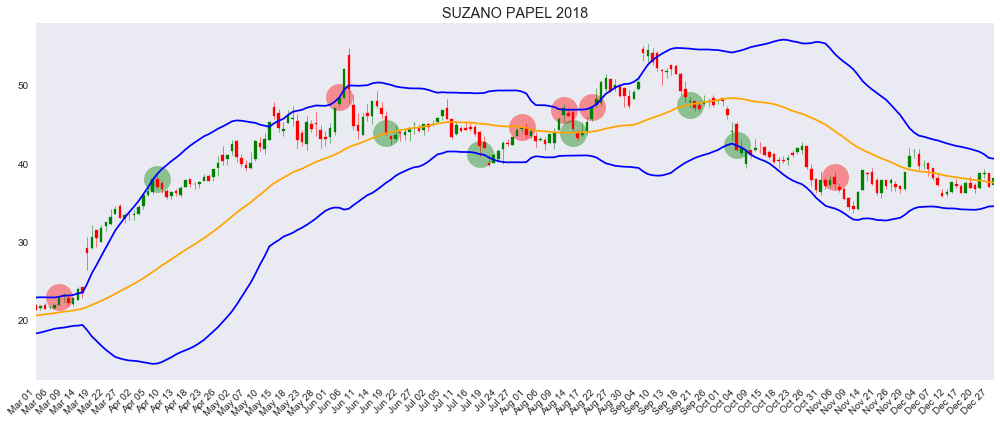

In [157]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(ncols=1, figsize=(14, 6))

# Parâmetros pro candle plot
fmt='%b %d'
freq=3
width=0.55
ohlc_data = candle_values

# Remover Final de Semana
# Convert data to numpy array 
ohlc_data_arr = np.array(ohlc_data)
ohlc_data_arr2 = np.hstack(
    [np.arange(ohlc_data_arr[:,0].size)[:,np.newaxis], ohlc_data_arr[:,1:]])
ndays = ohlc_data_arr2[:,0]  # array([0, 1, 2, ... n-2, n-1, n])

# Convert matplotlib date numbers to strings based on `fmt`
dates = mdates.num2date(ohlc_data_arr[:,0])
date_strings = []
for date in dates:
    date_strings.append(date.strftime(fmt))

# Plot candlestick chart
candle.candlestick_ohlc(ax, ohlc_data_arr2, width, colorup = 'g', colordown = 'r')
plt.grid()

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

# Plot indicadores
ax.plot(ohlc_data_arr2[:,0],stock['MA_40'], color = "orange")
ax.plot(ohlc_data_arr2[:,0],stock['BANDA_1_40 SUPERIOR'], color = "blue")
ax.plot(ohlc_data_arr2[:,0],stock['BANDA_1_40 INFERIOR'], color = "blue")

# Formating
ax.set_xticks(ndays[::freq])
ax.set_xticklabels(date_strings[::freq], rotation=45, ha='right', fontsize='medium')
ax.set_xlim(ndays.min(), ndays.max())
ax.set_title(stock['NOME RESUMIDO DA EMPRESA EMISSORA'].iloc[0] + " 2018")
plt.tight_layout()
plt.grid()

# Adjusting order index
new_order_id = []
order_id = 0
for each in range(len(stock)):
    if orders_df['DATA DO PREGAO'].iloc[order_id] == stock['DATA DO PREGAO'].iloc[each]:
        new_order_id.append(each)
        order_id = order_id + 1
    if order_id >= len(orders_df):
        break
    

# Plot ordens

for each_order in range(len(new_order_id)):
    if orders_df['OPERACAO'].iloc[each_order] == 'SELL':
        cor = 'red'
    else:
        cor = 'green'
    ax.scatter(new_order_id[each_order],orders_df['PRECO'].iloc[each_order], s=700, c=cor, alpha=.4)
plt.grid()


# ANALISE QUALITATIVA

In [160]:
# Pega ordens:
df = pd.read_csv('BACK_TEST/BollingerBandv2')
df = df.dropna()
df['DATA DO PREGAO'] = df['DATA DO PREGAO'].apply(lambda name: int(name) )
save_dir = 'BACK_TEST/BollingerBandv2'
df.to_csv(save_dir,index=False)
orders_df = pd.read_csv('BACK_TEST/BollingerBandv2', parse_dates=['DATA DO PREGAO'])
print(len(orders_df))
orders_df.head()

1088


,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,ABEV3,2018-03-01,22.529268,SELL
1,GGBR4,2018-03-01,17.090248,SELL
2,MGLU3,2018-03-01,90.794397,SELL
3,GOAU4,2018-03-01,8.114165,SELL
4,UGPA3,2018-03-01,75.205725,BUY


In [161]:
# Pega id das ordens não fechadas
id_to_remove = []
blue_chips = pd.read_csv('BLUECHIPS')
for bc_code in blue_chips['CODIGO DE NEGOCIACAO DO PAPEL']:
    df = orders_df[orders_df['CODIGO DE NEGOCIACAO DO PAPEL'] == bc_code].reset_index()
    if len(df)%2:
        id_to_remove.append(df.iloc[len(df)-1]['index'])

In [162]:
# Remove as ordens nao fechadas pelo id
lucro = 0
id_to_remove.sort(reverse=True)
for each_id in id_to_remove:
    orders_df = orders_df.drop(orders_df.index[each_id])
id_to_remove = []
print(len(orders_df))

1062


In [163]:
# Armazena os lucros individuais de cada ordem

ordem_fechada = []
for bc_code in blue_chips['CODIGO DE NEGOCIACAO DO PAPEL']:
    df = orders_df[orders_df['CODIGO DE NEGOCIACAO DO PAPEL'] == bc_code].reset_index()
    for i in range(int(len(df)/2)):
        i = i*2
        if df.iloc[i]['OPERACAO'] == 'BUY':
            # Se eu comprei antes, lucro = venda futura - compra presente
            lucro = (df.iloc[i+1]['PRECO'] - df.iloc[i]['PRECO'])/df.iloc[i]['PRECO']
        else:
            # Se eu vendi antes, lucro = venda atual - compra futura
            lucro = (df.iloc[i]['PRECO'] - df.iloc[i+1]['PRECO'])/df.iloc[i]['PRECO']
        ordem_fechada.append(lucro*100)
        
        if lucro*100 < -50:
            print("Pessimas operacoes: " + df.iloc[i]['CODIGO DE NEGOCIACAO DO PAPEL'])

Pessimas operacoes: SUZB3
Pessimas operacoes: ELPL3


Quantidade de ordens: 531
Média de lucro das ordens: -0.9431086648648241
Somatório de lucro individual: -500.79070104322165


<Container object of 531 artists>

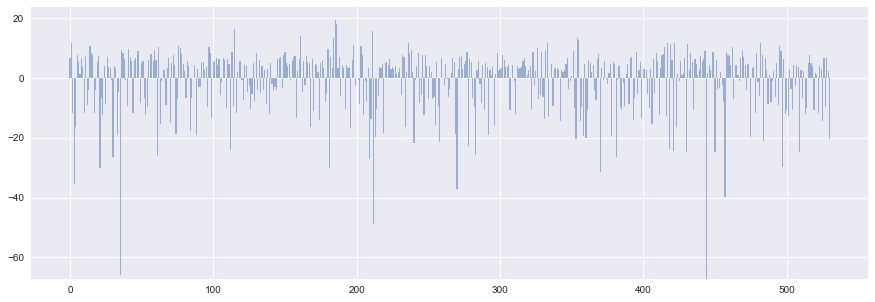

In [164]:
print("Quantidade de ordens: " + str(len(ordem_fechada)))
print("Média de lucro das ordens: " + str(sum(ordem_fechada)/len(ordem_fechada)))
print("Somatório de lucro individual: " + str(sum(ordem_fechada)))
x_values = np.arange(len(ordem_fechada))

params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

plt.bar(x_values, ordem_fechada, align='center', alpha=0.5)

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  1.,  2.,  0.,  1.,  2.,  2.,  1.,  0.,  1.,  0.,
         1.,  1.,  1.,  2.,  0.,  3.,  2.,  5.,  1.,  0.,  1.,  0.,  1.,
         5.,  1.,  2.,  1.,  2.,  3.,  2.,  3.,  3.,  6.,  8.,  2.,  1.,
        11.,  3.,  7.,  6.,  4.,  7.,  2.,  4.,  4.,  9.,  4.,  6.,  4.,
         3.,  4.,  5.,  6.,  3.,  3.,  6.,  3.,  2.,  5., 11.,  3.,  5.,
         1.,  8.,  5.,  9., 12., 18., 22., 20., 24., 19., 17., 19., 20.,
        11., 24., 16.,  8., 11., 14.,  8.,  5.,  4.

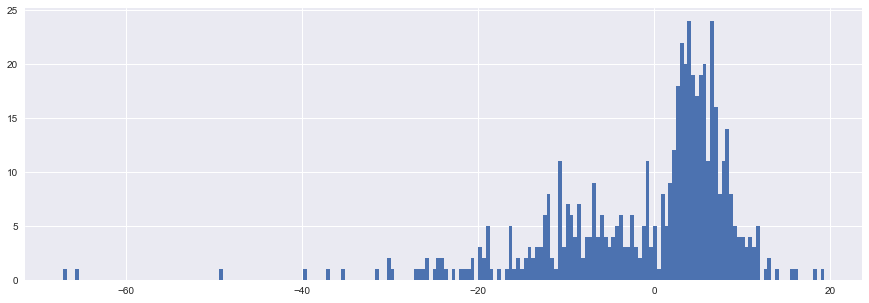

In [165]:
plt.hist(ordem_fechada,bins=200)

In [166]:
# Carteira inicial R$ 1.000.000
melhor_carteira = 0
best_p = 0
carteiras = []
for porcentagem in range(250):
    porcentagem = porcentagem + 20
    carteira = 1000000
    carteira_hist = [1000000]
    for i in range(len(orders_df)):
        order = orders_df.iloc[i]
        disponivel = carteira/porcentagem
        quantidade_papel = round(disponivel/order['PRECO'])
        if order['OPERACAO'] == 'BUY':
            carteira = carteira - quantidade_papel* order['PRECO']
        elif order['OPERACAO'] == 'SELL':
            carteira = carteira + quantidade_papel* order['PRECO']
        carteira_hist.append(carteira) 
    if carteira > melhor_carteira:
        melhor_carteira = carteira
        best_p = porcentagem
    carteiras.append(carteira)

In [167]:
print(best_p)
print("Valor final da carteira: ")
print(melhor_carteira)
print("\nPorcentagem em cada operação: ")
print(100/best_p)

((melhor_carteira - 1000000)/1000000) * 100

269
Valor final da carteira: 
993015.2991408268

Porcentagem em cada operação: 
0.37174721189591076


-0.6984700859173201

In [168]:
carteira = 1000000
carteira_hist = [1000000]
for i in range(len(orders_df)):
    order = orders_df.iloc[i]
    disponivel = carteira/best_p
    quantidade_papel = round(disponivel/order['PRECO'])
    if order['OPERACAO'] == 'BUY':
        carteira = carteira - quantidade_papel* order['PRECO']
    elif order['OPERACAO'] == 'SELL':
        carteira = carteira + quantidade_papel* order['PRECO']
    carteira_hist.append(carteira)
carteira

993015.2991408268

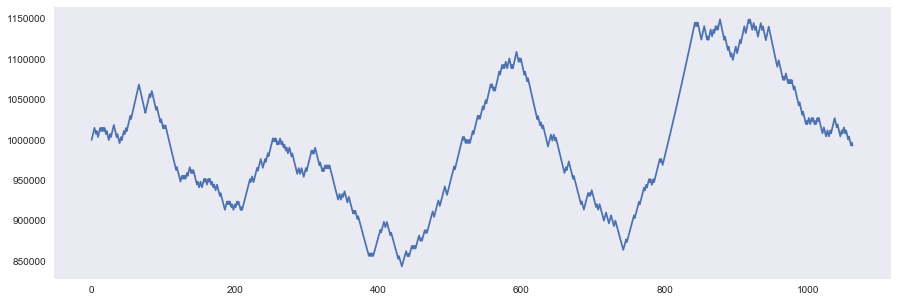

In [169]:
plt.plot(carteira_hist)
plt.grid()


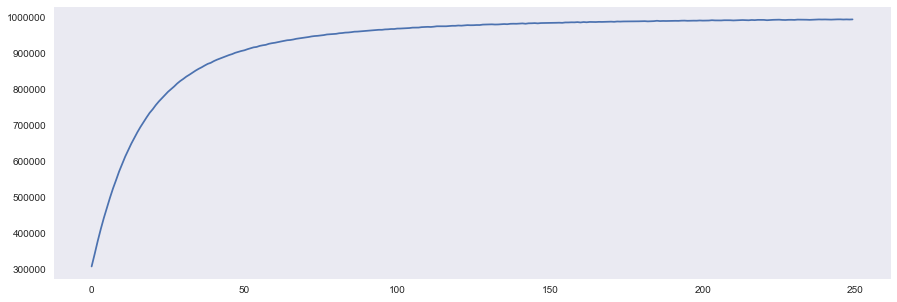

In [146]:
plt.plot(carteiras)
plt.grid()
